In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [5]:
car = pd.read_csv('Car_preproccesed_train.csv')
car.head()

,brand,model,model_year,milage,price,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_not supported,...,transmission_F,transmission_M/T,transmission_Manual,transmission_SCHEDULED FOR OR IN PRODUCTION,transmission_Single-Speed Fixed Gear,transmission_Transmission Overdrive Switch,transmission_Transmission w/Dual Shift Mode,transmission_Variable,transmission_–,accident_None reported
0,28,28,2002,143250,4999,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,58,2002,136731,13900,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,16,94,2017,19500,45000,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,36,509,2021,7388,97500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,96,2018,40950,29950,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
print(car.isnull().sum())  # Check for missing values


brand                                          0
model                                          0
model_year                                     0
milage                                         0
price                                          0
                                              ..
transmission_Transmission Overdrive Switch     0
transmission_Transmission w/Dual Shift Mode    0
transmission_Variable                          0
transmission_–                                 0
accident_None reported                         0
Length: 63, dtype: int64


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(car.drop(columns=['price']))  # Scale features, exclude target variable


In [8]:
from sklearn.model_selection import train_test_split

X = car.drop(columns=['price'])  # Features
y = car['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (147572, 62)
Testing set size: (36893, 62)


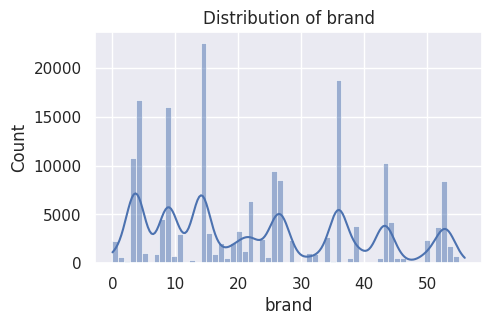

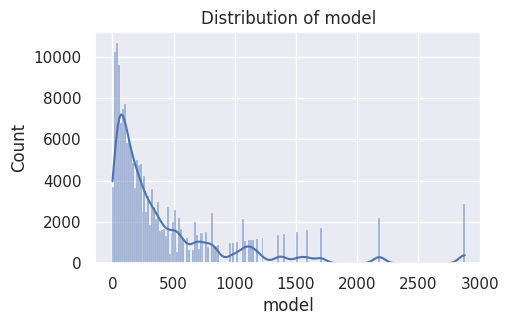

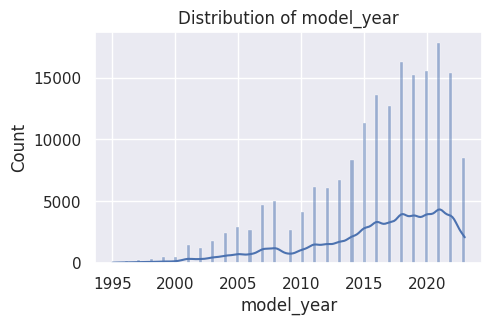

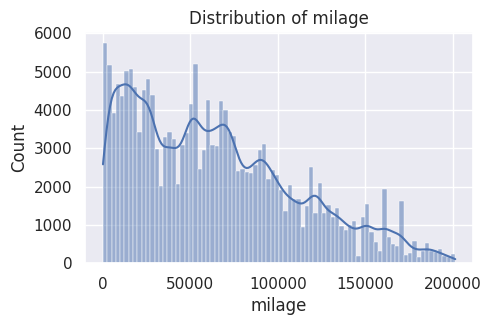

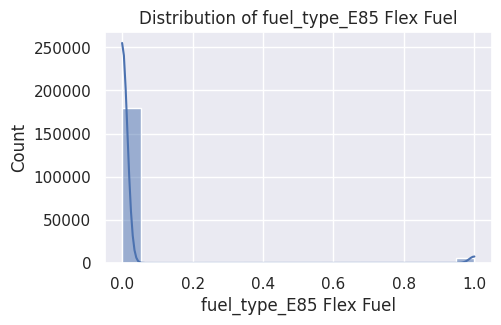

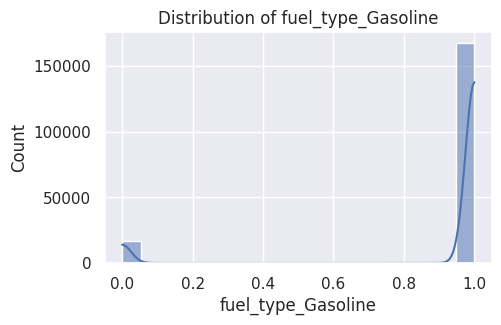

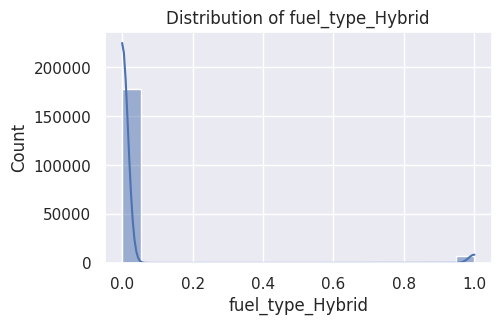

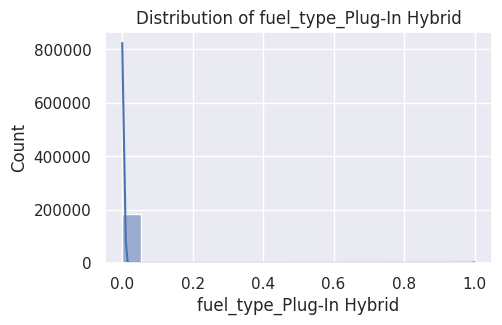

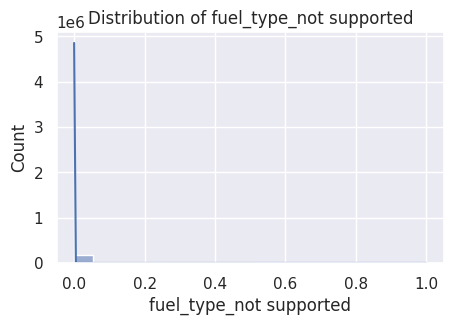

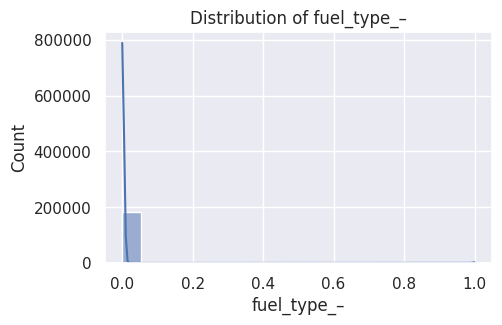

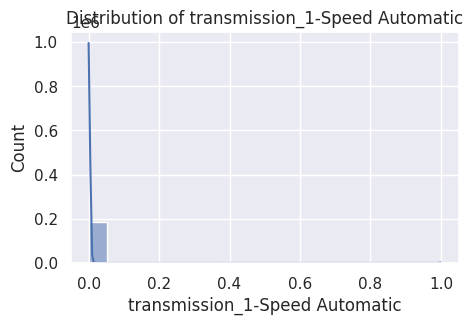

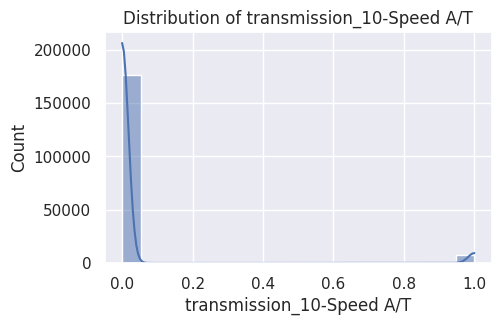

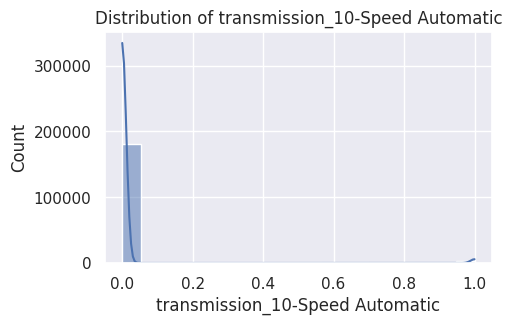

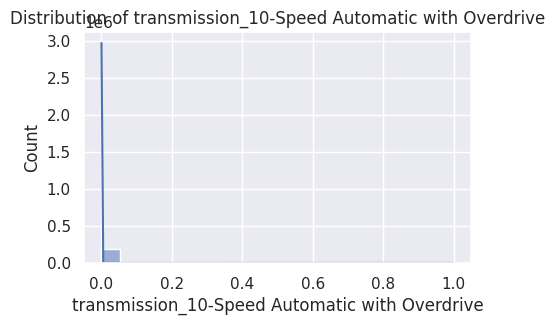

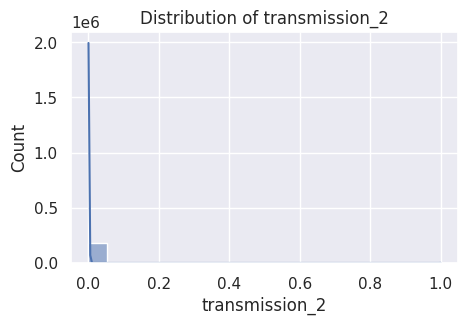

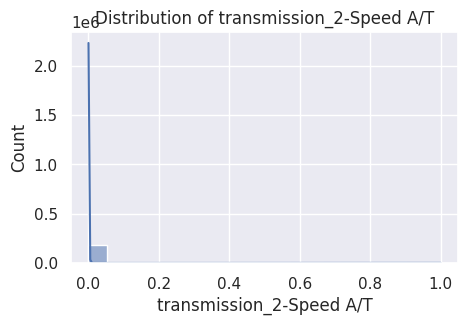

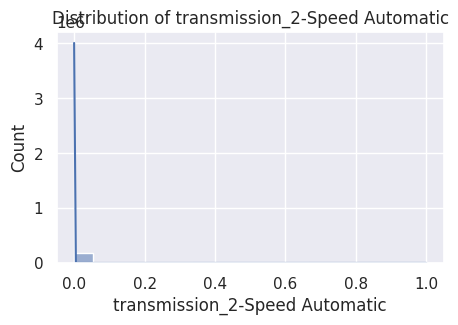

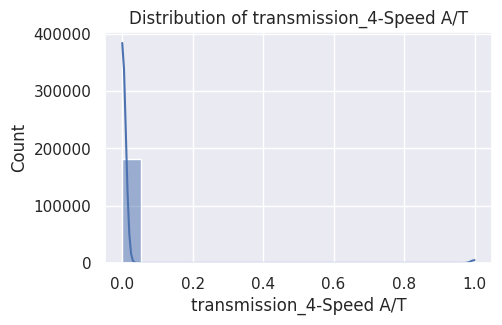

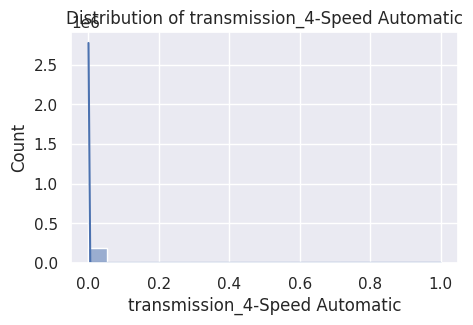

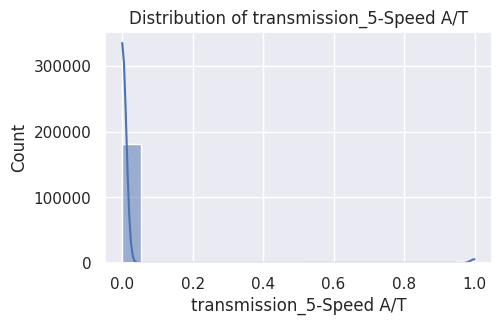

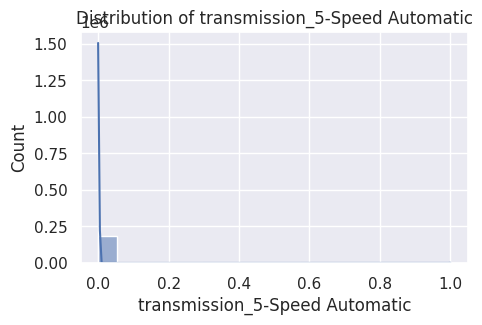

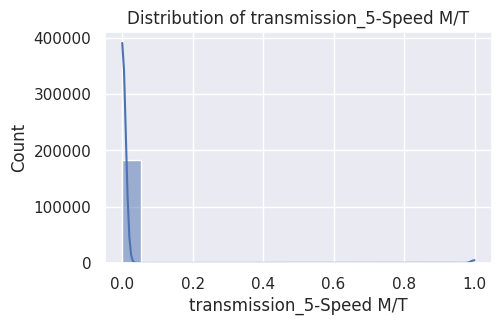

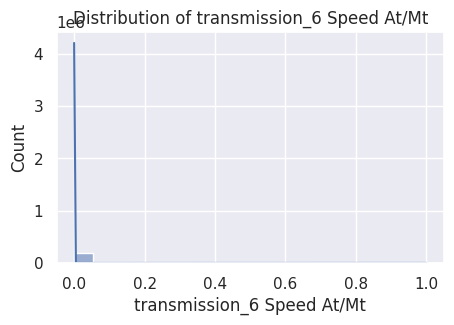

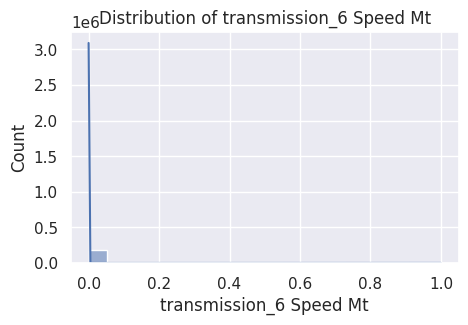

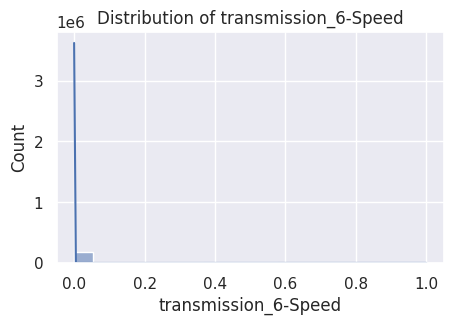

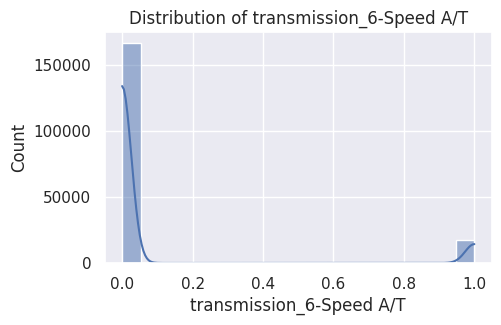

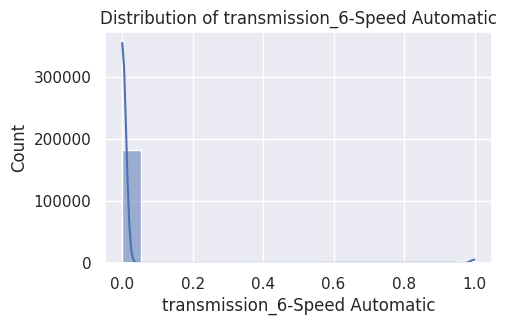

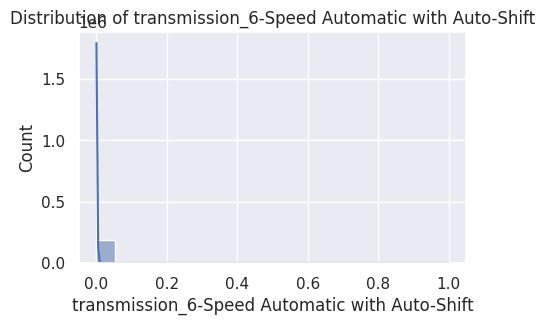

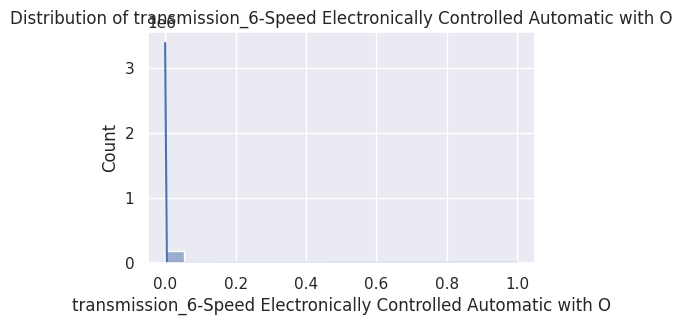

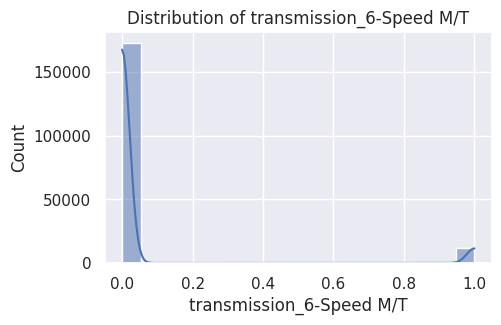

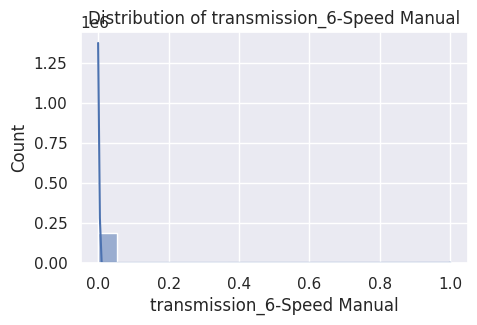

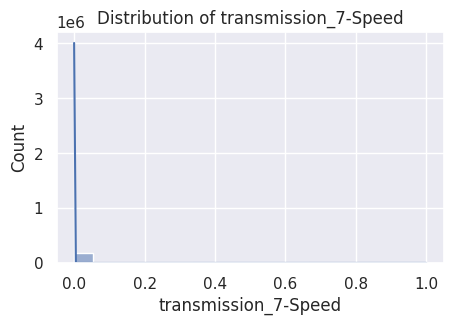

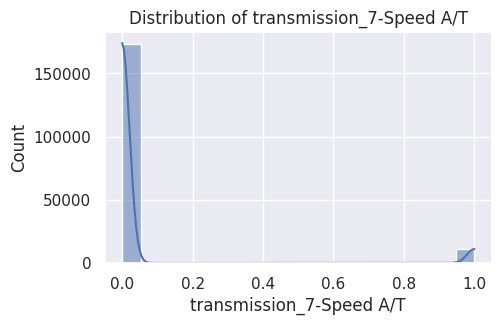

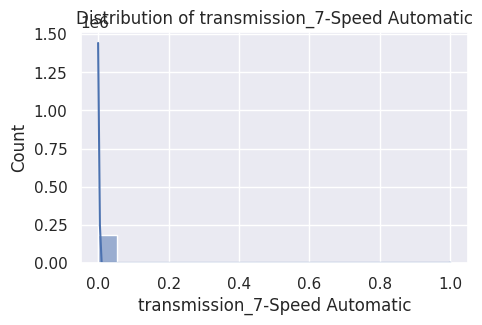

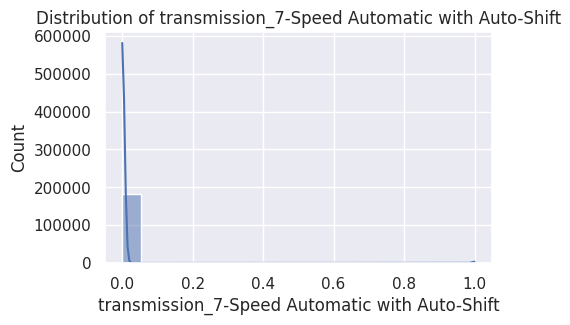

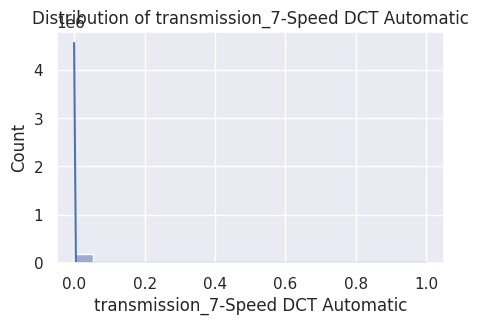

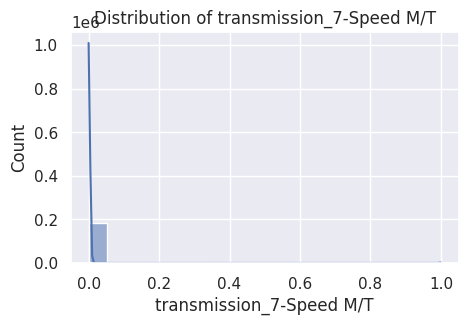

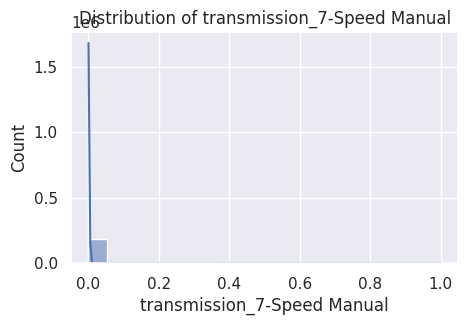

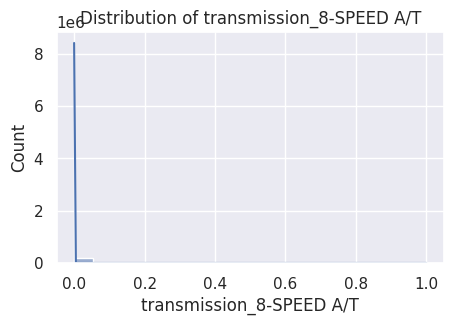

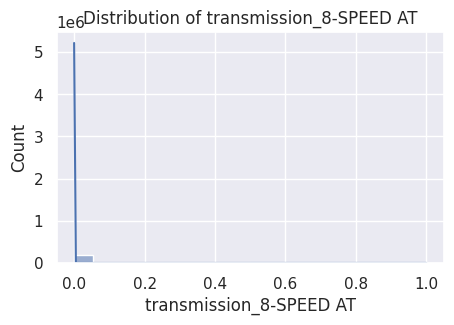

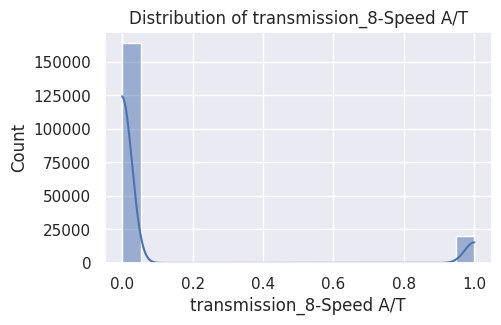

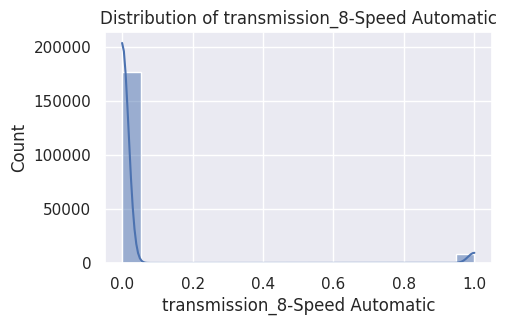

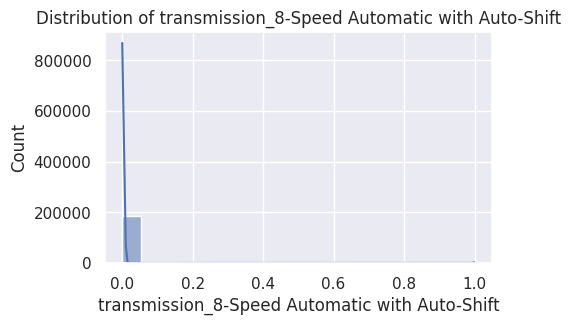

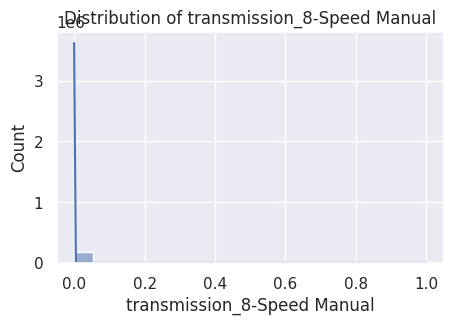

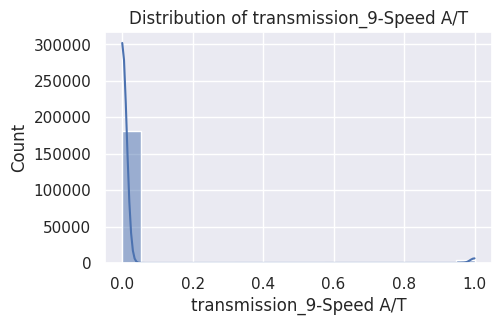

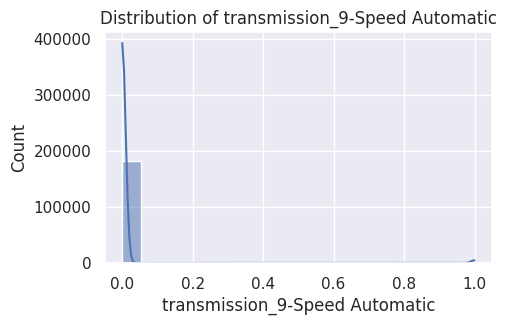

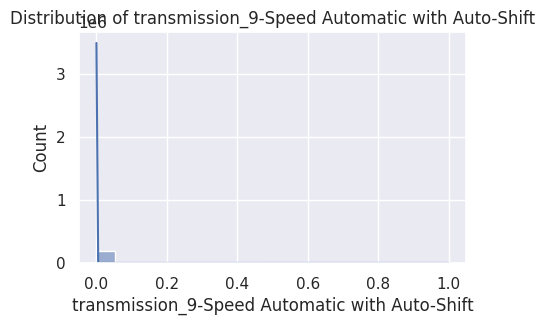

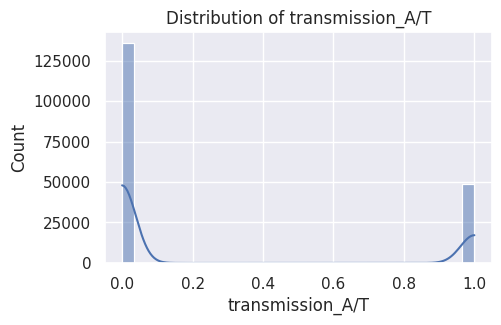

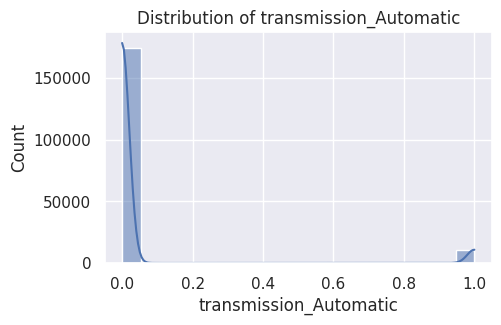

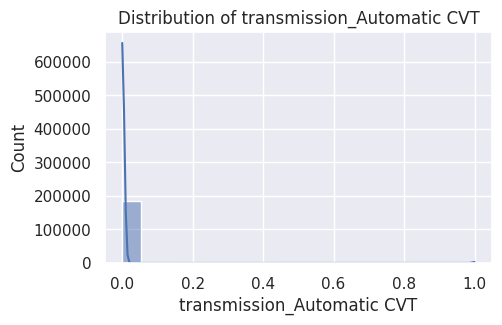

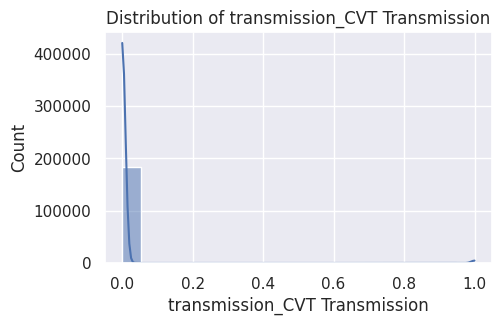

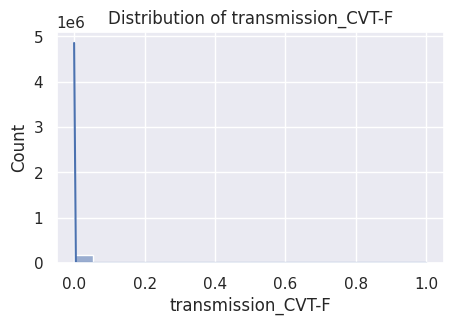

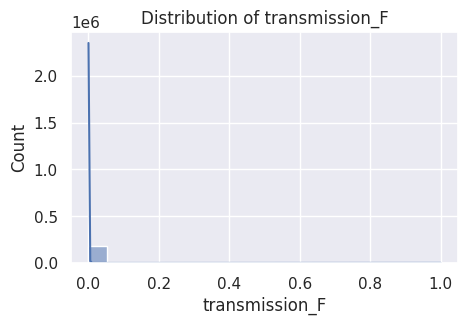

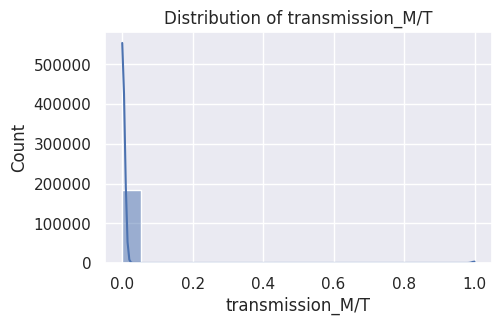

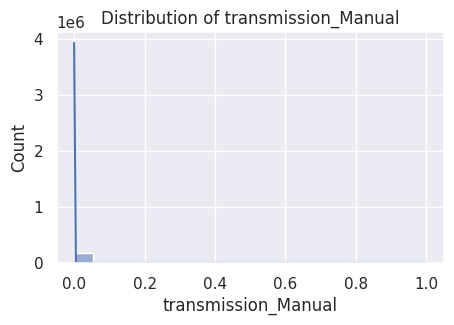

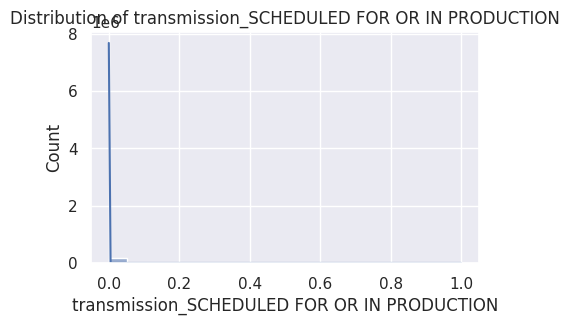

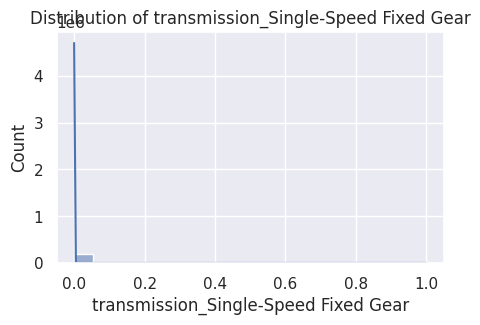

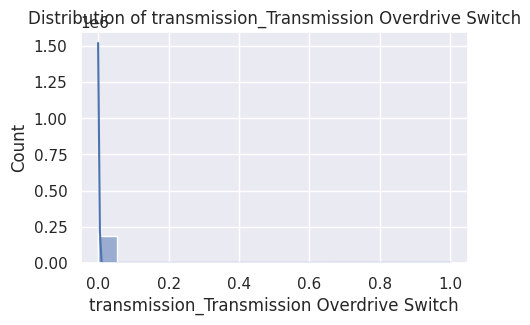

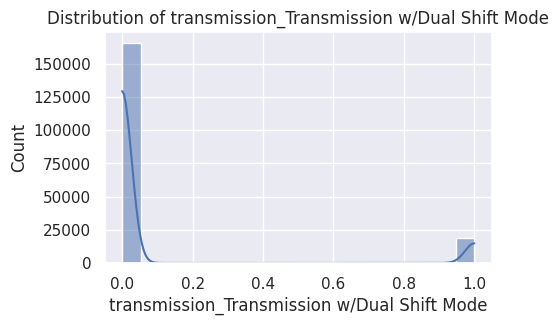

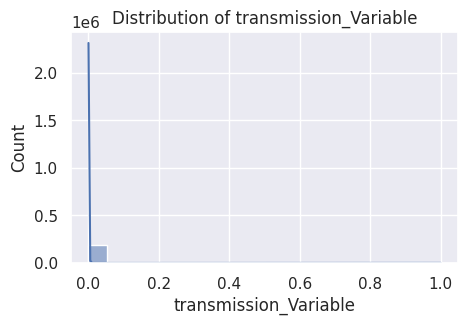

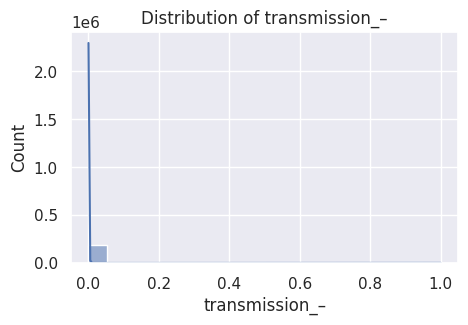

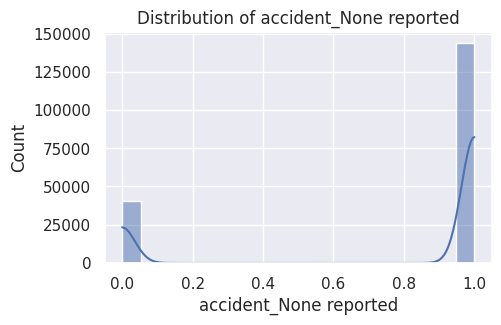

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in X.columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(car[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Linear Regression model
lr_model = LinearRegression()

# Train the model on the training set
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)


In [13]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Linear Regression Model Performance:
Mean Absolute Error (MAE): 16845.43
Root Mean Squared Error (RMSE): 27495.40
R² Score: 0.3518


In [14]:
# Create a DataFrame of feature importance
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr_model.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Display top features
print(feature_importance.head(10))  # Show top 10 features


                                           Feature   Coefficient
37                     transmission_7-Speed Manual  58183.778426
43                     transmission_8-Speed Manual  52467.892517
42  transmission_8-Speed Automatic with Auto-Shift  44022.668909
38                        transmission_8-SPEED A/T  42884.451042
60                                  transmission_–  41153.245580
31                            transmission_7-Speed  39684.274143
34  transmission_7-Speed Automatic with Auto-Shift  29103.401467
30                     transmission_6-Speed Manual  24579.623942
35              transmission_7-Speed DCT Automatic  24422.208496
36                        transmission_7-Speed M/T  22773.629669


Mean Absolute Error (MAE) = 16,845.43
This means that, on average, your model's price predictions are off by about $16,845.
Lower MAE is better; a high value suggests your model is struggling to make precise predictions.

Root Mean Squared Error (RMSE) = 27,495.40
RMSE measures the average magnitude of errors, but penalizes larger errors more than MAE.
Your model has an average error of around $27,495, which is quite high.
A lower RMSE is preferred, as it indicates smaller prediction errors.

R² Score = 0.3518
R² (Coefficient of Determination) measures how much variance in price is explained by the model.
Your model explains only 35.18% of the variance in car prices—which is quite low.
A perfect model would have R² = 1, and a model with no predictive power would have R² = 0.

Possible reasons for poor performance:
Important features might be missing (e.g., car condition, location, etc.).

Feature relationships might not be linear (Linear Regression assumes a straight-line relationship).

Multicollinearity could be an issue—some features might be redundant.

Outliers in data could be affecting predictions.
